In [1]:
import ROOT

Welcome to JupyROOT 6.22/02


In [2]:
file = ROOT.TFile('../data/D0D0Bar30TO50_New.root', 'READ')

In [72]:
c1 = ROOT.TCanvas("c1","c1",800,600)
h1 = ROOT.TH2F('rel_mom_v_sep', 'Lab Frame', 20, 0, 50, 20, 0, 50)

for entry in file.lab:
    # calculate relative separation
    xD      = ROOT.TVector3(entry.D_x, entry.D_y, entry.D_z)
    xDstar  = ROOT.TVector3(entry.Dstar_x, entry.Dstar_y, entry.Dstar_z)
    xRel    = xD - xDstar
    relSep  = xRel.Mag()
    relSep *= 0.1975 # convert to fm 

    # relative momenta
    pD      = ROOT.TVector3(entry.D_px, entry.D_py, entry.D_pz)
    pDstar  = ROOT.TVector3(entry.Dstar_px, entry.Dstar_py, entry.Dstar_pz)
    pRel    = pD - pDstar
    relMom  = pRel.Mag() 
    
    h1.Fill(relSep, relMom)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TFile::Append>: Replacing existing TH1: rel_mom_v_sep (Potential memory leak).


In [73]:
h1.GetXaxis().SetTitle("Relative Separation [fm]")
h1.GetYaxis().SetTitle("Relative Momentum [GeV]")
h1.SetOption("COLZ")     # colored bins
h1.SetStats(0)           # remove stats box
h1.Draw()

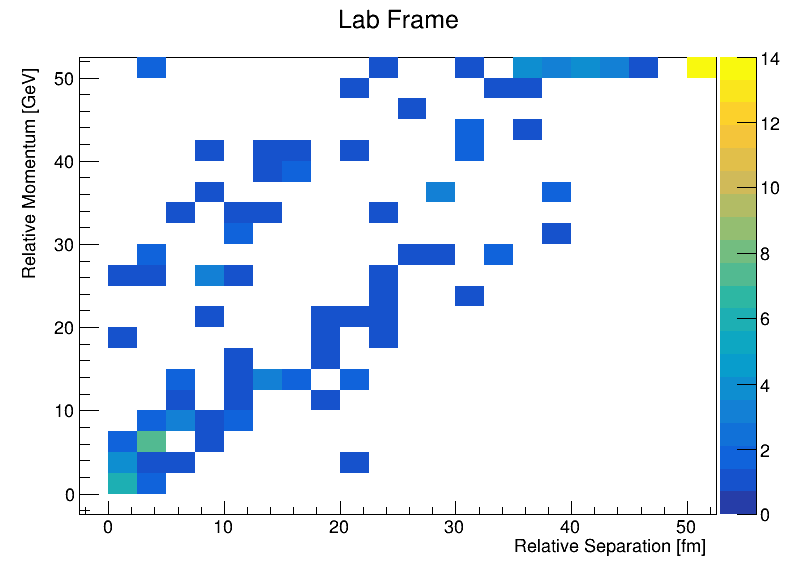

In [75]:
c1.Modified()
c1.Draw()